Epoch 1/50


c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0966
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0088
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0073
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0051
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0044
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0050
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0045
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0050
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0033
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0035
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0033
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0037
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0032
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0037
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0036
Epoch 16/50
10/

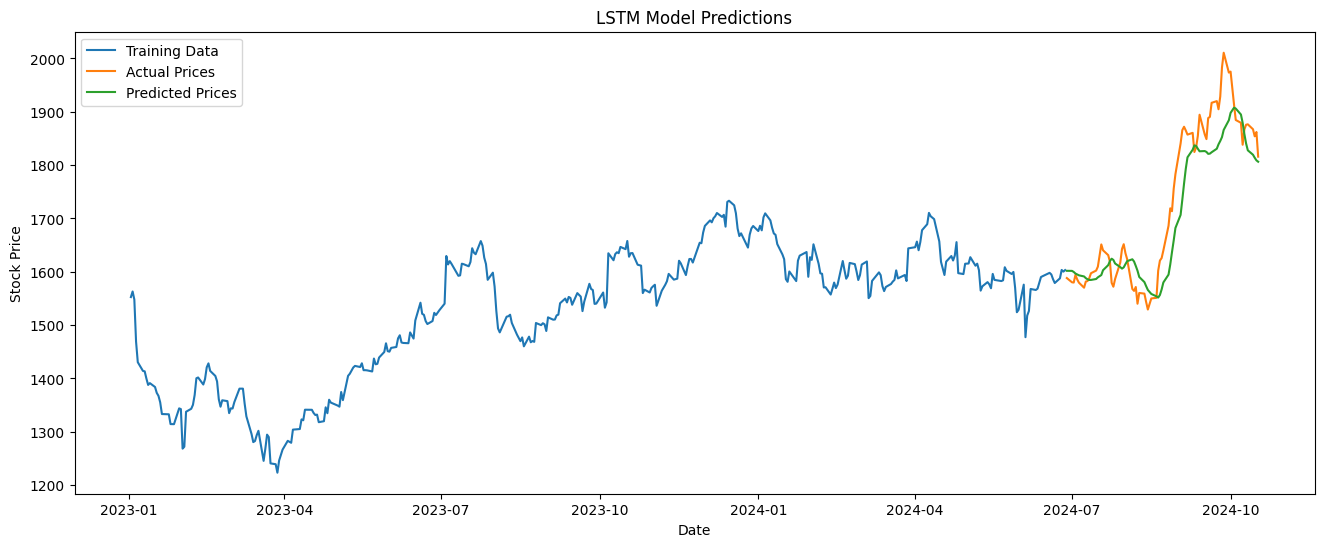

In [7]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Load the data
file_path = r"C:\Users\acer\OneDrive\Desktop\BAJAJFINSV.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Data Cleaning
df_cleaned = df[['Date', 'Close', 'Volume']].copy()
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned = df_cleaned.sort_values('Date')
df_cleaned.set_index('Date', inplace=True)

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_cleaned[['Close']])


def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

# sequence length (e.g., 60 days)
sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# Training and Testing sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=50)

# Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse transform to get actual values

# Results
train_data = df_cleaned[:train_size + sequence_length]
test_data = df_cleaned[train_size + sequence_length:].copy()
test_data['Predictions'] = predictions

plt.figure(figsize=(16, 6))
plt.plot(train_data['Close'], label='Training Data')
plt.plot(test_data['Close'], label='Actual Prices')
plt.plot(test_data['Predictions'], label='Predicted Prices')
plt.title('LSTM Model Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
